In [1]:
# Dependencies
import pandas as pd
from joblib import load
from tensorflow.keras.models import load_model

## Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("../Resources/exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

# Display dataframe
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


## Create a Train Test Split

In [3]:
# Set features as X value and label as y value
X = df.drop(columns=['koi_disposition'])
y = df['koi_disposition']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [5]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Scale your data
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

## Evaluate the Model

In [7]:
# Logistic Regression
lr_model = load('../Models/logistic.sav')
lr_accuracy = lr_model.best_score_

# SVC
svc_model = load('../Models/svc.sav')
svc_accuracy = svc_model.best_score_

# Decision Tree
tree_model = load('../Models/rf.sav')
tree_accuracy = tree_model.best_score_

In [8]:
from tensorflow.keras.utils import to_categorical

# Deep Learning
deep_model = load_model('../Models/deep_learning.h5')

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

deep_accuracy = model_accuracy

1748/1 - 0s - loss: 0.3060 - accuracy: 0.8804


In [9]:
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regresstion', 'SVM', 'Random Forest', 'Deep Learning'],
    'Score': [lr_accuracy, svc_accuracy, tree_accuracy, deep_accuracy]
})

comparison_df.set_index('Model', inplace=True)

In [10]:
comparison_df

,Score
Model,
Logistic Regresstion,0.880224
SVM,0.883275
Random Forest,0.898342
Deep Learning,0.880435


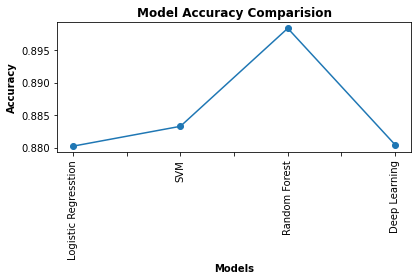

In [11]:
import matplotlib.pyplot as plt

compared_model = comparison_df.plot(kind='line', legend=False, marker='o', rot=90)
compared_model.set_title('Model Accuracy Comparision', fontweight='bold')
compared_model.set_xlabel('Models', fontweight='bold')
compared_model.set_ylabel('Accuracy', fontweight='bold')

# Save bar graph to Images folder
plt.tight_layout()
compared_model.figure.savefig('../../Images/model_comparison.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()